In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('hw7.csv')

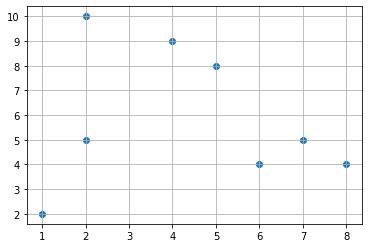

In [33]:
plt.scatter(df["x"],df["y"])
plt.grid()

In [3]:
def euclidian_distance(df,center_x,center_y):
    df2 = pd.DataFrame(columns = ["center_x","center_y","x","y","d"])
    for i in range(len(df["x"])):
        d_x = (center_x - df["x"][i]) ** 2
        d_y = (center_y - df["y"][i]) ** 2
        distance_diff_squared = d_x + d_y
        diff = np.sqrt(distance_diff_squared)
        df2.loc[i] = [center_x,center_y,df["x"][i],df["y"][i],diff]
    return df2

In [4]:
initial_cluster_1 = euclidian_distance(df,2,10).rename(columns={"d":"(2,10)"})#.sort_values(by="d",ascending=True)
initial_cluster_2 = euclidian_distance(df,5,8).rename(columns={"d": "(5,8)"})#.sort_values(by="d",ascending=True)
initial_cluster_3 = euclidian_distance(df,1,2).rename(columns={"d":"(1,2)"})#.sort_values(by="d",ascending=True)

In [24]:
new_df = pd.concat([initial_cluster_1["(2,10)"],initial_cluster_2["(5,8)"],initial_cluster_3["(1,2)"]],axis=1)
new_df.rename(index={0: "(2,10)", 1: "(2,5)", 2: "(8,4)",3:"(5,8)",4:"(7,5)",5:"(6,4)",6:"(1,2)",7:"(4,9)"})

,"(2,10)","(5,8)","(1,2)"
"(2,10)",0.000000,3.605551,8.062258
"(2,5)",5.000000,4.242641,3.162278
"(8,4)",8.485281,5.000000,7.280110
"(5,8)",3.605551,0.000000,7.211103
"(7,5)",7.071068,3.605551,6.708204
"(6,4)",7.211103,4.123106,5.385165
"(1,2)",8.062258,7.211103,0.000000
"(4,9)",2.236068,1.414214,7.615773


In [34]:
new_df["initial_cluster"] = 0
cols = new_df.columns

for i in range(len(new_df["(2,10)"])):
    min_val = min(new_df.iloc[i][:3])
    rel_index = np.where(new_df.iloc[i]==min_val)[0][0]
    new_df["initial_cluster"][i] = cols[rel_index]

/var/folders/n9/3mjn__fd1xd66lc1zh9nlj0h0000gp/T/ipykernel_5519/973875848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["initial_cluster"][i] = cols[rel_index]


In [43]:
new_df2 = pd.concat([new_df,df["x"],df["y"]],axis=1)
new_df2

,"(2,10)","(5,8)","(1,2)",initial_cluster,x,y
0,0.000000,3.605551,8.062258,"(2,10)",2,10
1,5.000000,4.242641,3.162278,"(1,2)",2,5
2,8.485281,5.000000,7.280110,"(5,8)",8,4
3,3.605551,0.000000,7.211103,"(5,8)",5,8
4,7.071068,3.605551,6.708204,"(5,8)",7,5
5,7.211103,4.123106,5.385165,"(5,8)",6,4
6,8.062258,7.211103,0.000000,"(1,2)",1,2
7,2.236068,1.414214,7.615773,"(5,8)",4,9


In [47]:
final_cluster1 = [[],[]]
final_cluster2 = [[],[]]
final_cluster3 = [[],[]]

for i in range(len(new_df2["initial_cluster"])):
    if new_df2["initial_cluster"][i] == "(2,10)":
        final_cluster1[0].append(new_df2["x"][i])
        final_cluster1[1].append(new_df2["y"][i])
    elif new_df2["initial_cluster"][i] == "(5,8)":
        final_cluster2[0].append(new_df2["x"][i])
        final_cluster2[1].append(new_df2["y"][i])
    else:
        final_cluster3[0].append(new_df2["x"][i])
        final_cluster3[1].append(new_df2["y"][i])

In [56]:
final_final_cluster1 = [np.mean(final_cluster1[0]),np.mean(final_cluster1[1])]
final_final_cluster2 = [np.mean(final_cluster2[0]),np.mean(final_cluster2[1])]
final_final_cluster3 = [np.mean(final_cluster3[0]),np.mean(final_cluster3[1])]

[2.0, 10.0]


In [79]:
print(final_final_cluster1)
print(final_final_cluster2)
print(final_final_cluster3)

[2.0, 10.0]
[6.0, 6.0]
[1.5, 3.5]


In [61]:
final_final_final_cluster1 = euclidian_distance(df,final_final_cluster1[0],final_final_cluster1[1]).rename(columns={"d":"(2,10)"})
final_final_final_cluster2 = euclidian_distance(df,final_final_cluster2[0],final_final_cluster2[1]).rename(columns={"d":"(5,8)"})
final_final_final_cluster3 = euclidian_distance(df,final_final_cluster3[0],final_final_cluster3[1]).rename(columns={"d":"(1,2)"})

In [70]:
new_df3 = pd.concat([final_final_final_cluster1["(2,10)"],final_final_final_cluster2["(5,8)"],final_final_final_cluster3["(1,2)"]],axis=1)
new_df3.rename(index={0: "(2,10)", 1: "(2,5)", 2: "(8,4)",3:"(5,8)",4:"(7,5)",5:"(6,4)",6:"(1,2)",7:"(4,9)"})

new_df3["final_cluster"] = 0
cols = new_df3.columns

for i in range(len(new_df3["(2,10)"])):
    min_val = min(new_df3.iloc[i][:3])
    rel_index = np.where(new_df3.iloc[i]==min_val)[0][0]
    new_df3["final_cluster"][i] = cols[rel_index]

/var/folders/n9/3mjn__fd1xd66lc1zh9nlj0h0000gp/T/ipykernel_5519/4035228119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df3["final_cluster"][i] = cols[rel_index]


In [76]:
final_df = pd.concat([new_df["initial_cluster"],new_df3["final_cluster"]],axis=1)
final_df.rename(index={0: "(2,10)", 1: "(2,5)", 2: "(8,4)",3:"(5,8)",4:"(7,5)",5:"(6,4)",6:"(1,2)",7:"(4,9)"})

,initial_cluster,final_cluster
"(2,10)","(2,10)","(2,10)"
"(2,5)","(1,2)","(1,2)"
"(8,4)","(5,8)","(5,8)"
"(5,8)","(5,8)","(5,8)"
"(7,5)","(5,8)","(5,8)"
"(6,4)","(5,8)","(5,8)"
"(1,2)","(1,2)","(1,2)"
"(4,9)","(5,8)","(2,10)"


In [77]:
final_df

,initial_cluster,final_cluster
0,"(2,10)","(2,10)"
1,"(1,2)","(1,2)"
2,"(5,8)","(5,8)"
3,"(5,8)","(5,8)"
4,"(5,8)","(5,8)"
5,"(5,8)","(5,8)"
6,"(1,2)","(1,2)"
7,"(5,8)","(2,10)"
